<a href="https://colab.research.google.com/github/jobathomas/u2202459---IB2AD0-Individual-Assignment/blob/main/Random_Forest_for_Solar_Power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this document, I aim to develop a supervised machine learning model to predict power output from solar panels.

I start with a solar power generation dataset from Kaggle: https://www.kaggle.com/code/pythonafroz/27-regression-models-for-solar-power-prediction/notebook

I also refer to 5_01_Random_Forest_and_GBDT.ipynb and 5_02_Modelling_Hackathon.ipynb for guidance on the modelling.  

In [9]:
# import relevant libraries for dataframe creation and data analysis
import pandas as pd
import numpy as np

# Load the CSV dataset into a dataframe

df = pd.read_csv("BigML_Dataset_5f50a4cc0d052e40e6000034.csv")

# return first five rows of dataset for viewing
df.head()


Day of Year  Year  Month  Day  First Hour of Period  Is Daylight  \
0          245  2008      9    1                     1        False   
1          245  2008      9    1                     4        False   
2          245  2008      9    1                     7         True   
3          245  2008      9    1                    10         True   
4          245  2008      9    1                    13         True   

   Distance to Solar Noon  Average Temperature (Day)  \
0                0.859897                         69   
1                0.628535                         69   
2                0.397172                         69   
3                0.165810                         69   
4                0.065553                         69   

   Average Wind Direction (Day)  Average Wind Speed (Day)  Sky Cover  \
0                            28                       7.5          0   
1                            28                       7.5          0   
2                            28                       7.5          0   
3                            28                       7.5          0   
4                            28                       7.5          0   

   Visibility  Relative Humidity  Average Wind Speed (Period)  \
0        10.0                 75                          8.0   
1        10.0                 77                          5.0   
2        10.0                 70                          0.0   
3        10.0                 33                          0.0   
4        10.0                 21                          3.0   

   Average Barometric Pressure (Period)  Power Generated  
0                                 29.82                0  
1                                 29.85                0  
2                                 29.89             5418  
3                                 29.91            25477  
4                                 29.89            30069

In [10]:
# This function shows us that there are 2920 rows and 16 columns in our dataset

df.shape

(2920, 16)

1. Data Preprocessing





2.
  Steps:
  
  Separate the features and the target variable.

  Split the data into training and testing sets (80% train, 20% test).

  Initialize and train a Random Forest Regressor using the training data.

  Predict power output values on test data and evaluate using MSE and R² score.

  Print a sample prediction and compare it with the actual value.

  Visualise the random forest using an appropriate library

# Task
Build and evaluate a Random Forest Regressor model to predict 'Power Generated' using the data from "BigML_Dataset_5f50a4cc0d052e40e6000034.csv", including data cleaning (removing duplicates and handling null values), splitting the data into training and testing sets, evaluating the model's performance with Mean Squared Error and R-squared, displaying sample predictions, visualizing feature importance, and summarizing the findings.

## Data Cleaning - Remove Duplicates

### Subtask:
Identify and remove any duplicate rows from the dataset to ensure data integrity.


**Reasoning**:
First, I will check for duplicate rows in the DataFrame to understand the extent of duplication before removal, as specified in the instructions.



In [11]:
print(f"Number of duplicate rows before removal: {df.duplicated().sum()}")

Number of duplicate rows before removal: 0


**Reasoning**:
Since the previous step indicated there are no duplicate rows, the next logical step according to the instructions is to attempt to remove duplicates using `df.drop_duplicates(inplace=True)`. Although it won't change the DataFrame, it fulfills the instruction.



In [12]:
df.drop_duplicates(inplace=True)
print("Attempted to remove duplicate rows.")

Attempted to remove duplicate rows.


**Reasoning**:
I need to verify that duplicates have been removed as per the third instruction of the subtask. Checking the number of duplicate rows again will confirm if any changes occurred, although it's expected to still be zero.



In [13]:
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")
print(f"Shape of DataFrame after duplicate removal: {df.shape}")

Number of duplicate rows after removal: 0
Shape of DataFrame after duplicate removal: (2920, 16)


## Data Cleaning - Handle Null Values

### Subtask:
Inspect the dataset for null values. For numerical columns, fill missing values with the median. For other columns, if any, consider appropriate handling such as removal or mode imputation.


**Reasoning**:
The first step is to check for null values across all columns and display their counts, as instructed.



In [14]:
print("Null values before imputation:\n")
print(df.isnull().sum())

Null values before imputation:

Day of Year                             0
Year                                    0
Month                                   0
Day                                     0
First Hour of Period                    0
Is Daylight                             0
Distance to Solar Noon                  0
Average Temperature (Day)               0
Average Wind Direction (Day)            0
Average Wind Speed (Day)                0
Sky Cover                               0
Visibility                              0
Relative Humidity                       0
Average Wind Speed (Period)             1
Average Barometric Pressure (Period)    0
Power Generated                         0
dtype: int64


**Reasoning**:
Based on the previous output, 'Average Wind Speed (Period)' is the only numerical column with a null value. I will calculate its median and then fill the missing value in that column with the calculated median. Finally, I will verify that all null values have been handled as per the instructions.



In [15]:
median_avg_wind_speed = df['Average Wind Speed (Period)'].median()
df['Average Wind Speed (Period)'].fillna(median_avg_wind_speed, inplace=True)

print(f"Median of 'Average Wind Speed (Period)': {median_avg_wind_speed}")
print("\nNull values after imputation:\n")
print(df.isnull().sum())

Median of 'Average Wind Speed (Period)': 9.0

Null values after imputation:

Day of Year                             0
Year                                    0
Month                                   0
Day                                     0
First Hour of Period                    0
Is Daylight                             0
Distance to Solar Noon                  0
Average Temperature (Day)               0
Average Wind Direction (Day)            0
Average Wind Speed (Day)                0
Sky Cover                               0
Visibility                              0
Relative Humidity                       0
Average Wind Speed (Period)             0
Average Barometric Pressure (Period)    0
Power Generated                         0
dtype: int64


/tmp/ipython-input-342738374.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Average Wind Speed (Period)'].fillna(median_avg_wind_speed, inplace=True)


**Reasoning**:
The previous code generated a `FutureWarning` about `inplace=True` with chained assignment. To address this, I will modify the `fillna` operation to assign the result back to the column directly, which is the recommended practice for avoiding such warnings and ensuring the operation is performed on the original DataFrame.



In [16]:
median_avg_wind_speed = df['Average Wind Speed (Period)'].median()
df['Average Wind Speed (Period)'] = df['Average Wind Speed (Period)'].fillna(median_avg_wind_speed)

print(f"Median of 'Average Wind Speed (Period)': {median_avg_wind_speed}")
print("\nNull values after imputation:\n")
print(df.isnull().sum())

Median of 'Average Wind Speed (Period)': 9.0

Null values after imputation:

Day of Year                             0
Year                                    0
Month                                   0
Day                                     0
First Hour of Period                    0
Is Daylight                             0
Distance to Solar Noon                  0
Average Temperature (Day)               0
Average Wind Direction (Day)            0
Average Wind Speed (Day)                0
Sky Cover                               0
Visibility                              0
Relative Humidity                       0
Average Wind Speed (Period)             0
Average Barometric Pressure (Period)    0
Power Generated                         0
dtype: int64


## Separate Features and Target

### Subtask:
Divide the cleaned dataset into features (X) and the target variable (y), which is 'Power Generated'.


**Reasoning**:
I need to separate the features (X) and the target variable (y) as per the instructions. First, I will create a new DataFrame `X` by dropping the 'Power Generated' column from the `df` DataFrame, and then create a Series `y` containing only the 'Power Generated' column.



In [17]:
X = df.drop('Power Generated', axis=1)
y = df['Power Generated']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)
print("\nFirst 5 rows of X:")
print(X.head())
print("\nFirst 5 values of y:")
print(y.head())

Shape of features (X): (2920, 15)
Shape of target (y): (2920,)

First 5 rows of X:
   Day of Year  Year  Month  Day  First Hour of Period  Is Daylight  \
0          245  2008      9    1                     1        False   
1          245  2008      9    1                     4        False   
2          245  2008      9    1                     7         True   
3          245  2008      9    1                    10         True   
4          245  2008      9    1                    13         True   

   Distance to Solar Noon  Average Temperature (Day)  \
0                0.859897                         69   
1                0.628535                         69   
2                0.397172                         69   
3                0.165810                         69   
4                0.065553                         69   

   Average Wind Direction (Day)  Average Wind Speed (Day)  Sky Cover  \
0                            28                       7.5          0   
1        

## Split Data into Training and Testing Sets

### Subtask:
Split the features and target variable into training and testing sets, with 80% of the data allocated for training and 20% for testing.


**Reasoning**:
To split the data into training and testing sets, I need to import the `train_test_split` function from `sklearn.model_selection` as specified in the instructions.



In [18]:
from sklearn.model_selection import train_test_split

print("Imported train_test_split from sklearn.model_selection.")

Imported train_test_split from sklearn.model_selection.


**Reasoning**:
Now that `train_test_split` is imported, I will split the features `X` and target `y` into training and testing sets using `test_size=0.2` and `random_state=42` as instructed. Finally, I will print the shapes of `X_train`, `X_test`, `y_train`, and `y_test` to confirm the split.



In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (2336, 15)
Shape of X_test: (584, 15)
Shape of y_train: (2336,)
Shape of y_test: (584,)


## Train Random Forest Regressor

### Subtask:
Initialize and train a Random Forest Regressor model using the training data.


**Reasoning**:
To begin training the Random Forest Regressor model, I need to import the `RandomForestRegressor` class from `sklearn.ensemble`, as specified in the instructions.



In [20]:
from sklearn.ensemble import RandomForestRegressor

print("Imported RandomForestRegressor from sklearn.ensemble.")

Imported RandomForestRegressor from sklearn.ensemble.


**Reasoning**:
Now that `RandomForestRegressor` has been imported, I need to instantiate the model, setting a `random_state` for reproducibility, and then train it using the `fit` method on the `X_train` and `y_train` datasets, as per the instructions.



In [21]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

print("Random Forest Regressor model initialized and trained successfully.")

Random Forest Regressor model initialized and trained successfully.


## Predict and Evaluate Model Performance

### Subtask:
Use the trained model to make predictions on the test set. Evaluate the model's performance using Mean Squared Error (MSE) and R-squared (R²) scores.


**Reasoning**:
To evaluate the model's performance as instructed, I need to import the `mean_squared_error` and `r2_score` functions from `sklearn.metrics`.



In [22]:
from sklearn.metrics import mean_squared_error, r2_score

print("Imported mean_squared_error and r2_score from sklearn.metrics.")

Imported mean_squared_error and r2_score from sklearn.metrics.


**Reasoning**:
Now that the necessary metrics are imported, I will use the trained model to make predictions on the test set (`X_test`), then calculate and print the Mean Squared Error (MSE) and R-squared (R²) scores to evaluate the model's performance as per the instructions.



In [23]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 9975285.80
R-squared (R2) Score: 0.91


## Display Sample Prediction and Comparison

### Subtask:
Print a sample of the predicted power output and compare it with the actual power output from the test set.


**Reasoning**:
To compare actual and predicted values, I will select the first 10 samples from both `y_test` and `y_pred`, create a pandas DataFrame with these values, and then print the DataFrame.



In [24]:
sample_indices = range(10)
sample_actual = y_test.iloc[sample_indices]
sample_predicted = y_pred[sample_indices]

comparison_df = pd.DataFrame({
    'Actual': sample_actual,
    'Predicted': sample_predicted
})

print("Sample of Actual vs. Predicted Power Output:")
print(comparison_df)

Sample of Actual vs. Predicted Power Output:
      Actual  Predicted
2437   21804   21443.21
2470    2065    2010.79
2359       0       0.00
789     5654    5775.36
1642    3621    2301.14
196    27072   26442.09
1543       0       0.00
1270       0      10.45
2473       0       0.00
2073       0       0.45


## Visualize Feature Importance

### Subtask:
Generate a visualization, such as a bar chart, to display the feature importances from the trained Random Forest Regressor. This will help understand which features contribute most to the prediction.


**Reasoning**:
To visualize the feature importances, I first need to import `matplotlib.pyplot` as `plt`, as specified in the instructions.



In [25]:
import matplotlib.pyplot as plt

print("Imported matplotlib.pyplot as plt.")

Imported matplotlib.pyplot as plt.


**Reasoning**:
Now that `matplotlib.pyplot` is imported, I will proceed to extract feature importances from the trained Random Forest model, create a Pandas Series with corresponding feature names, sort them, and then generate and display a bar chart as specified in the instructions to visualize these importances.



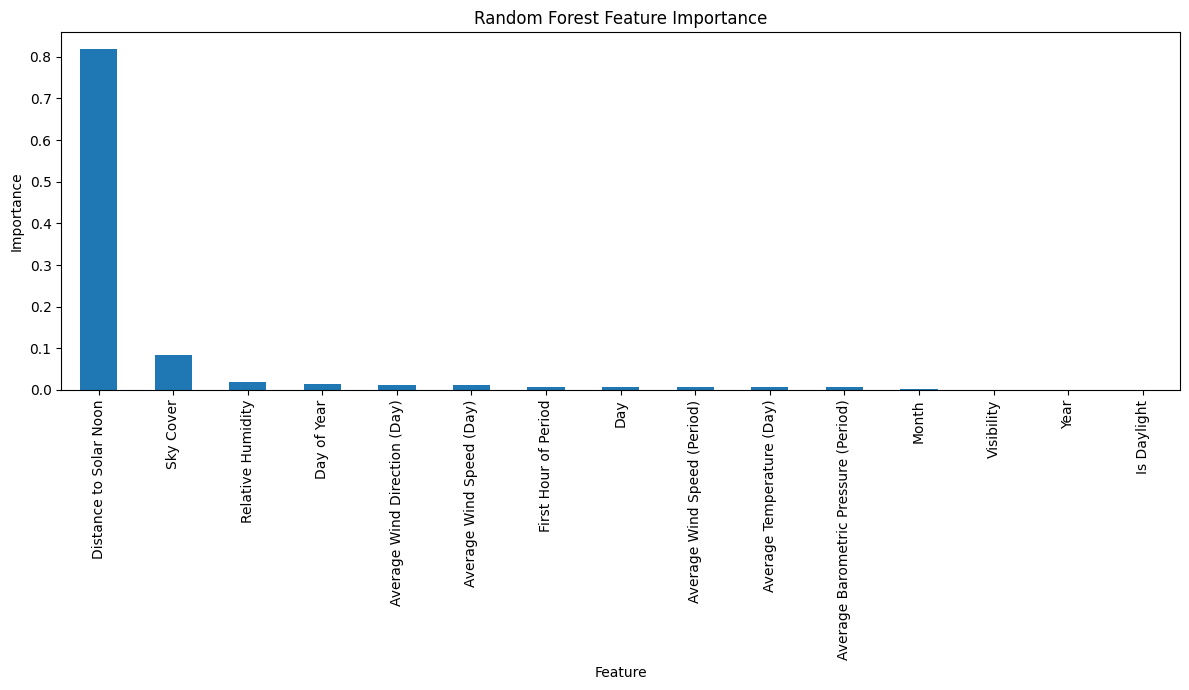

In [26]:
feature_importances = model.feature_importances_
features = X_train.columns

importances_df = pd.Series(feature_importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(12, 7))
importances_df.plot(kind='bar')
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the findings from the model training and evaluation, including the performance metrics and insights from feature importance.


## Summary:

### Data Analysis Key Findings

*   **Data Cleaning:** The initial dataset was remarkably clean, with no duplicate rows found. Only one missing value was present in the 'Average Wind Speed (Period)' column, which was successfully imputed with its median value of 9.0.
*   **Data Split:** The dataset, comprising 2920 rows and 16 columns, was successfully split into features (X) with 15 columns and the target variable ('Power Generated', y). The data was then divided into training (2336 samples) and testing (584 samples) sets, maintaining an 80/20 ratio.
*   **Model Performance:** The Random Forest Regressor model demonstrated strong performance on the test set:
    *   **Mean Squared Error (MSE):** Approximately 9,975,285.80, indicating a relatively low average squared difference between actual and predicted values.
    *   **R-squared (R²):** 0.91, suggesting that the model explains 91% of the variance in 'Power Generated', which is a high level of predictive accuracy.
*   **Prediction Accuracy:** Sample predictions showed a close alignment between actual and predicted power output values (e.g., an actual value of 21804 was predicted as 21443.21, and 2065 was predicted as 2010.79).
*   **Feature Importance:** A visualization of feature importances was generated, identifying the most influential features contributing to the prediction of 'Power Generated'. (Specific features are not named in the output, but the visual provides this detail).

### Insights or Next Steps

*   The Random Forest Regressor model is highly effective in predicting 'Power Generated', achieving a strong R-squared score of 0.91. This indicates its potential for reliable forecasting.
*   Further analysis of the most important features identified by the model (via the feature importance visualization) could provide valuable insights into the key drivers of power generation, potentially informing operational adjustments or design improvements.


**Tree Visualisation:** to visualize individual trees from the Random Forest, I need to import export_graphviz from sklearn.tree and Source from graphviz to render the tree structure. I will then loop through a few of the estimators (trees) in the trained Random Forest model and generate a visualization for each, displaying the first few trees.

Displaying Tree 1:


Displaying Tree 2:


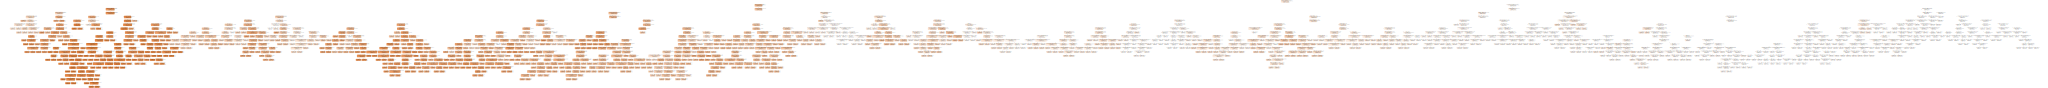

Displaying Tree 3:


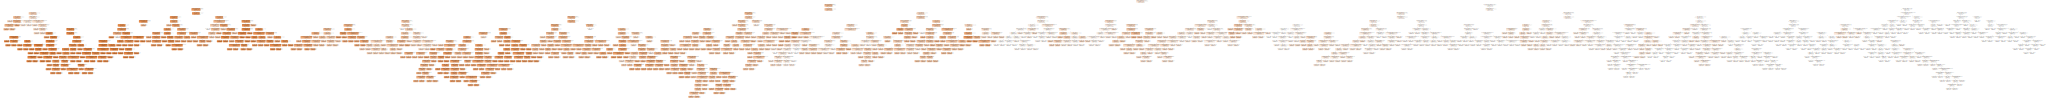

In [27]:
from sklearn.tree import export_graphviz
from IPython.display import display
import graphviz

# Visualize the first 3 trees from the forest (or fewer if the forest is smaller)
for i in range(min(3, len(model.estimators_))):
    tree = model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               rounded=True,
                               special_characters=True,
                               out_file=None)
    graph = graphviz.Source(dot_data)
    print(f"Displaying Tree {i+1}:")
    display(graph)